# <a id='toc1_'></a>[Similary Analysis](#toc0_)

**Table of contents**<a id='toc0_'></a>    
- [Similary Analysis](#toc1_)    
  - [Compute Similarities](#toc1_1_)    
  - [Visualize Similarities](#toc1_2_)    
    - [CLIP Similarities](#toc1_2_1_)    
    - [Visualize SSIM](#toc1_2_2_)    
  - [Combined CLIP Analysis](#toc1_3_)    
  - [Misc: Tokenizer Analysis](#toc1_4_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch

from tools import analysis

In [2]:
metadata_path = "data/imagewoof/metadata"
dataset_name = "Imagewoof" # Title on the plots

clip_model_path = "openai/clip-vit-large-patch14"
device = "cuda" if torch.cuda.is_available() else "cpu"

## <a id='toc1_1_'></a>[Compute Similarities](#toc0_)

In [3]:
df = pd.read_csv(f"{metadata_path}\imageGen_trace.csv")
df.head(1)

,class_pairs,class_id,image_id,interpolation_step,embed_len,pos_prompt_text,neg_prompt_text,input_file_path,output_file_path,input_prompts_embed
0,"('n02086240', 'n02088364')",n02086240,508,6,16,"a photo of a Shih-Tzu, a type of dog","a photo of a beagle, a type of dog",data/imagewoof/train/n02086240/n02086240_4994....,data/imagewoof/synthetic/n02086240/47967303435...,NaN


In [4]:
df = analysis.computeSimilarityByInterpolation(
    df,
    clip_model_path=clip_model_path,
    device=device,
    save=f"{metadata_path}\imageGen_trace_clip.csv",
)
df.head(1)

100%|██████████| 9046/9046 [22:00<00:00,  6.85it/s]  


,class_pairs,class_id,image_id,interpolation_step,embed_len,pos_prompt_text,neg_prompt_text,input_file_path,output_file_path,input_prompts_embed,text_real_sim,text_synth_sim,image_real_synth_sim,ssim
0,"('n02086240', 'n02088364')",n02086240,508,6,16,"a photo of a Shih-Tzu, a type of dog","a photo of a beagle, a type of dog",data/imagewoof/train/n02086240/n02086240_4994....,data/imagewoof/synthetic/n02086240/47967303435...,NaN,21.884798,19.743652,64.898014,0.267221


## <a id='toc1_2_'></a>[Visualize Similarities](#toc0_)

In [5]:
df = pd.read_csv(f"{metadata_path}\imageGen_trace_clip.csv")
df["interpolation_step"] = df["interpolation_step"] + 1

In [6]:
df.head()

,class_pairs,class_id,image_id,interpolation_step,embed_len,pos_prompt_text,neg_prompt_text,input_file_path,output_file_path,input_prompts_embed,text_real_sim,text_synth_sim,image_real_synth_sim,ssim
0,"('n02086240', 'n02088364')",n02086240,508,7,16,"a photo of a Shih-Tzu, a type of dog","a photo of a beagle, a type of dog",data/imagewoof/train/n02086240/n02086240_4994....,data/imagewoof/synthetic/n02086240/47967303435...,NaN,21.884798,19.743652,64.898014,0.267221
1,"('n02086240', 'n02088364')",n02086240,74,6,16,"a photo of a Shih-Tzu, a type of dog","a photo of a beagle, a type of dog",data/imagewoof/train/n02086240/n02086240_11094...,data/imagewoof/synthetic/n02086240/47967303435...,NaN,22.145570,24.344105,75.691515,0.250771
2,"('n02086240', 'n02088364')",n02086240,555,4,16,"a photo of a Shih-Tzu, a type of dog","a photo of a beagle, a type of dog",data/imagewoof/train/n02086240/n02086240_5445....,data/imagewoof/synthetic/n02086240/47967303435...,NaN,18.472980,24.627325,63.237005,0.391960
3,"('n02086240', 'n02088364')",n02086240,310,2,16,"a photo of a Shih-Tzu, a type of dog","a photo of a beagle, a type of dog",data/imagewoof/train/n02086240/n02086240_3128....,data/imagewoof/synthetic/n02086240/47967303435...,NaN,28.048388,27.608603,72.855610,0.405424
4,"('n02086240', 'n02088364')",n02086240,509,5,16,"a photo of a Shih-Tzu, a type of dog","a photo of a beagle, a type of dog",data/imagewoof/train/n02086240/n02086240_4999....,data/imagewoof/synthetic/n02086240/47967303435...,NaN,26.978544,29.030207,85.612005,0.456386


### <a id='toc1_2_1_'></a>[CLIP Similarities](#toc0_)

<Axes: title={'center': 'Imagewoof: CLIP Score vs. Interpolation Step'}, xlabel='Interpolation Step', ylabel='CLIP Score of\nText Embeddings vs. Synthetic Image Embeddings'>

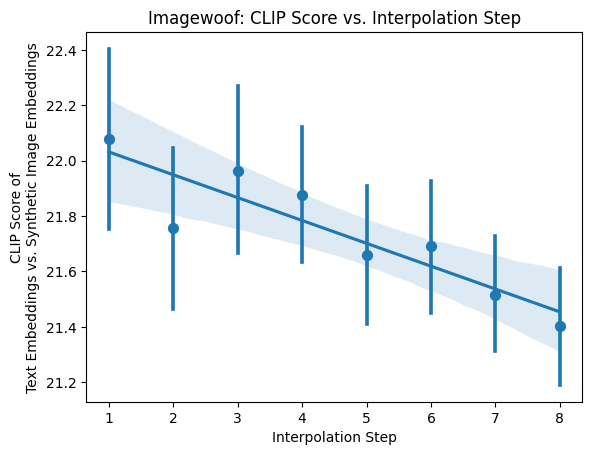

In [7]:
analysis.getRegPlot(
    df,
    x="interpolation_step",
    y="text_synth_sim",
    title=f"{dataset_name}: CLIP Score vs. Interpolation Step",
    xlabel="Interpolation Step",
    ylabel="CLIP Score of\nText Embeddings vs. Synthetic Image Embeddings",
    save=f"{metadata_path}/text_synth_regplot.svg",
)

<Axes: title={'center': 'Imagewoof: CLIP Score vs. Interpolation Step'}, xlabel='Interpolation Step', ylabel='CLIP Score of\nOriginal Image Embeddings vs. Synthetic Image Embeddings'>

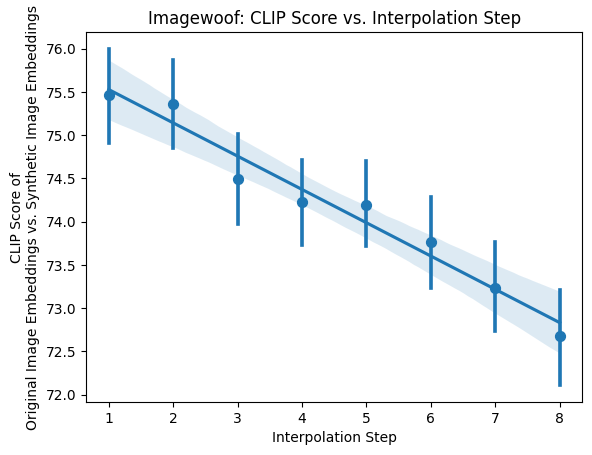

In [8]:
analysis.getRegPlot(
    df,
    x="interpolation_step",
    y="image_real_synth_sim",
    title=f"{dataset_name}: CLIP Score vs. Interpolation Step",
    xlabel="Interpolation Step",
    ylabel="CLIP Score of\nOriginal Image Embeddings vs. Synthetic Image Embeddings",
    save=f"{metadata_path}/ori_synth_regplot.svg",
)

### <a id='toc1_2_2_'></a>[Visualize SSIM](#toc0_)

<Axes: title={'center': 'Imagewoof: Structural Similarity Index (SSIM) vs. Interpolation Step'}, xlabel='Interpolation Step', ylabel='SSIM of Original Images vs. Synthetic Images'>

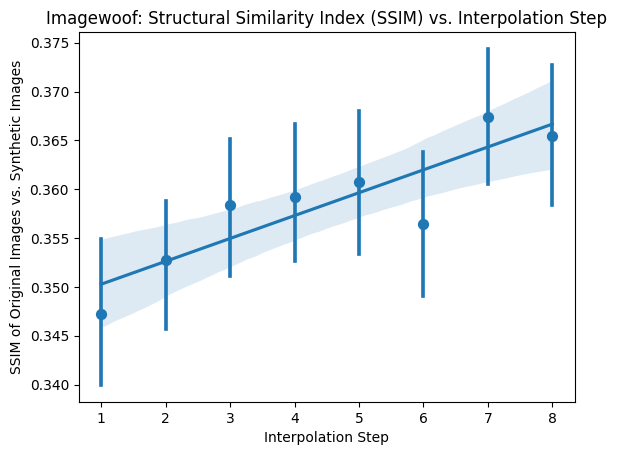

In [9]:
analysis.getRegPlot(
    df,
    x="interpolation_step",
    y="ssim",
    title=f"{dataset_name}: Structural Similarity Index (SSIM) vs. Interpolation Step",
    xlabel="Interpolation Step",
    ylabel="SSIM of Original Images vs. Synthetic Images",
    save=f"{metadata_path}/ssim_regplot.svg",
)

## <a id='toc1_3_'></a>[Combined CLIP Analysis](#toc0_)

In [ ]:
dfs = {
    ("imagenette", "Imagenette"): dict(),
    ("woof", "Imagewoof"): dict(),
    ("stanford-dogs", "Stanford Dogs"): dict(),
}
for dataset, dataset_name in dfs.keys():
    df = pd.read_csv(f"data\{dataset}\metadata\imageGen_trace_clip.csv")
    dfs[(dataset, dataset_name)]["df"] = df
    dfs[(dataset, dataset_name)]["metadata_path"] = f"data\{dataset}\metadata"
    dfs[(dataset, dataset_name)]["dataset_name"] = dataset_name

In [ ]:
combined = {"Interpolation Steps": [], "Similarity": [], "Dataset": [], "Measure": [], "Class": []}

In [ ]:
for (dataset, dataset_name), data in dfs.items():
    df = data["df"].copy()
    df["interpolation_step"] = df["interpolation_step"] + 1
    metadata_path = data["metadata_path"]
    for i, row in df.iterrows():
        combined["Interpolation Steps"].append(row["interpolation_step"])
        combined["Similarity"].append(row["image_real_synth_sim"])
        combined["Dataset"].append(dataset_name)
        combined["Measure"].append("CLIP Score")
        combined["Class"].append(row["class_id"])

        combined["Interpolation Steps"].append(row["interpolation_step"])
        combined["Similarity"].append(row["ssim"])
        combined["Dataset"].append(dataset_name)
        combined["Measure"].append("SSIM")
        combined["Class"].append(row["class_id"])

In [ ]:
df_combined = pd.DataFrame(combined)
df_combined.head()

,Interpolation Steps,Similarity,Dataset,Measure,Class
0,4,44.117561,Imagenette,CLIP Score,n03445777
1,4,0.176814,Imagenette,SSIM,n03445777
2,5,40.843749,Imagenette,CLIP Score,n03445777
3,5,0.180333,Imagenette,SSIM,n03445777
4,1,41.802415,Imagenette,CLIP Score,n03445777


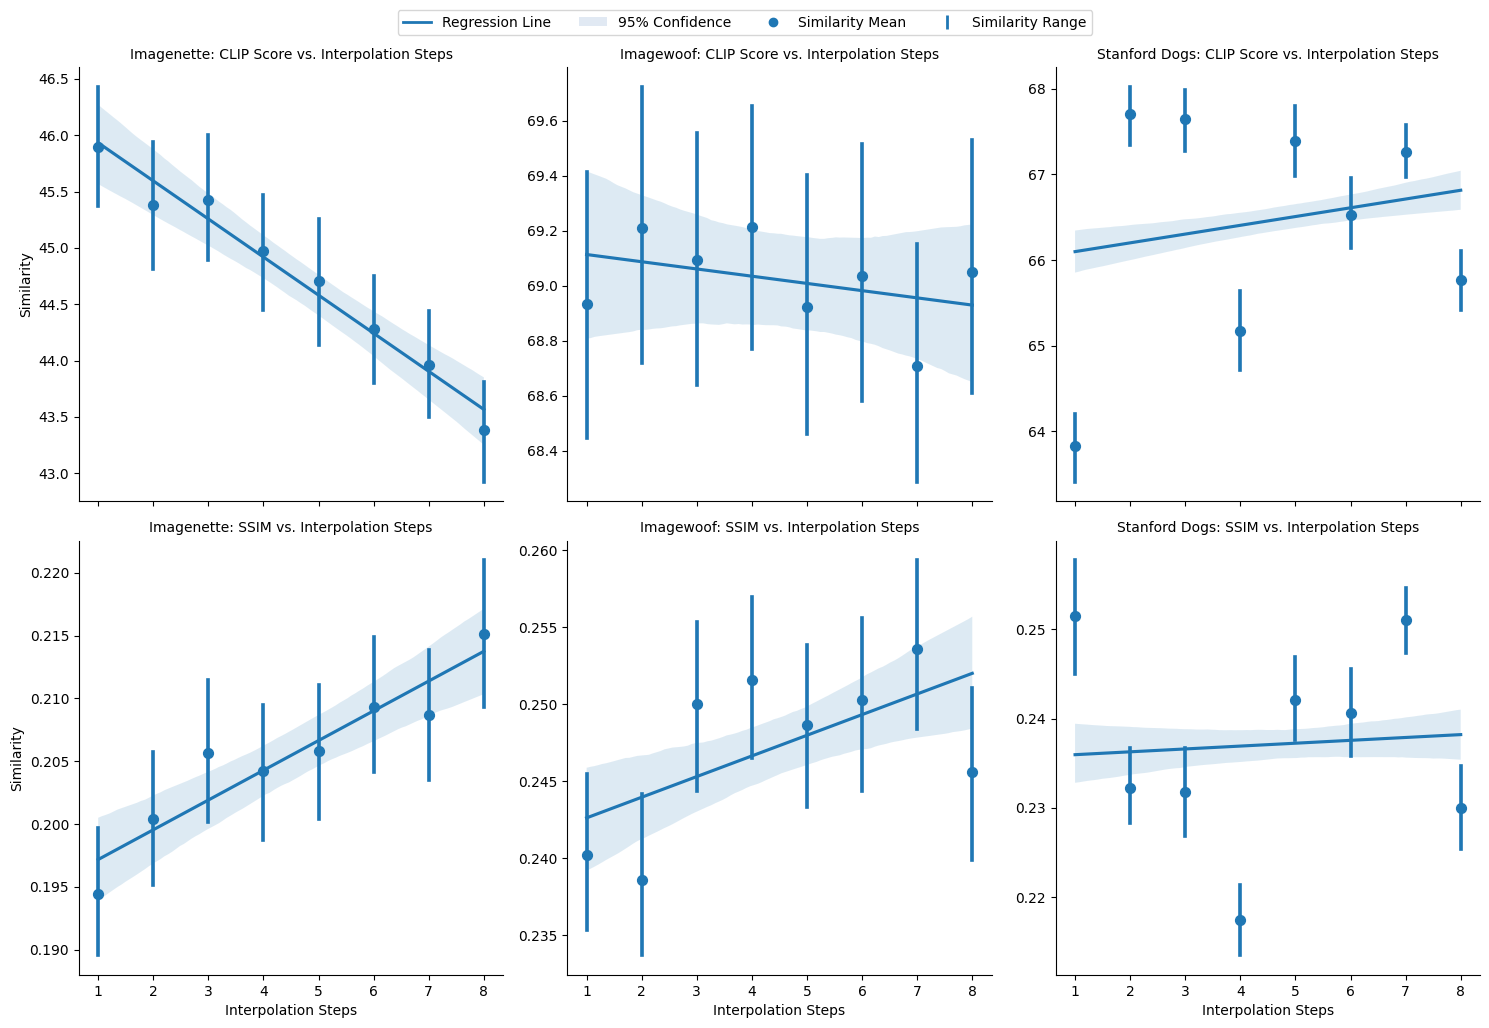

In [ ]:
ax = sns.lmplot(
    data=df_combined,
    x="Interpolation Steps",
    y="Similarity",
    col="Dataset",
    row="Measure",
    facet_kws=dict(sharex=True, sharey=False),
    x_estimator=np.mean,
    order=1,
)
ax.set_titles("{col_name}: {row_name} vs. Interpolation Steps")
ax.figure.legend(
    loc="upper center",
    bbox_to_anchor=(0.5, 1.03),
    handles=[
        plt.Line2D([0], [0], color=sns.color_palette()[0], lw=2),
        plt.Rectangle((0, 0), 1, 1, fc="#e1e9f3", ec="#e1e9f3", lw=0),
        plt.Line2D([0], [0], marker="o", color=sns.color_palette()[0], lw=0),
        plt.Line2D([0], [0], marker="|", color=sns.color_palette()[0], lw=0, markersize=10, markeredgewidth=2),
    ],
    labels=["Regression Line", "95% Confidence", "Similarity Mean", "Similarity Range"],
    ncol=4,
)
ax.tight_layout()
ax.savefig(f"{metadata_path}\combined_regplot.svg")

## <a id='toc1_4_'></a>[Misc: Tokenizer Analysis](#toc0_)

In [ ]:
import torch
from transformers import CLIPModel, CLIPProcessor

clip_model_path = "openai/clip-vit-large-patch14"
clip_processor = CLIPProcessor.from_pretrained(clip_model_path)
device = "cuda" if torch.cuda.is_available() else "cpu"
clip_model = CLIPModel.from_pretrained(clip_model_path).to(device)

In [ ]:
text = "a photo of a English foxhound, a type of dog"
label_tokens = clip_processor(
    text=text, padding=True, images=None, return_tensors="pt"
).to(device)

In [ ]:
for i in label_tokens["input_ids"][0]:
    print(f"Token {i}: {clip_processor.decode(i)}")

Token 49406: <|startoftext|>
Token 320: a
Token 1125: photo
Token 539: of
Token 320: a
Token 3469: english
Token 5007: fox
Token 13561: hound
Token 267: ,
Token 320: a
Token 3877: type
Token 539: of
Token 1929: dog
Token 49407: <|endoftext|>
